#Project Title: "Weather Data Analysis Tool"
##Objective
Develop a Python application that analyzes and visualizes weather data, providing insights such as temperature trends, rainfall patterns, and extreme weather events using file handling and
Python core concepts.

##Project Tasks
#1. Data Initialization
● Use a CSV file containing weather data with fields like:

○ Date, Temperature (°C), Rainfall (mm), Humidity (%), Wind Speed
(km/h), Condition (Sunny, Rainy, etc.).

● Load and manipulate the data using Python core tools (no external libraries).
#2. Importing and Validating Data
● Allow users to:

○ Import new weather data into the application.

○ Validate the input to ensure correct formats for date and numerical fields.

● Handle missing or incomplete records:

○ Replace missing values with averages or predefined defaults.

#3. Analyzing Weather Trends
● Calculate key statistics:

○ Average temperature, rainfall, and humidity over specific periods.

○ Days with the highest and lowest temperature or rainfall.

○ Count of sunny, rainy, or windy days in a given month.

#4. Weather Reports
● Generate summary reports for a user-specified date range:

○ Display the average, maximum, and minimum values for temperature, rainfall,
and wind speed.

○ List days with extreme conditions, such as storms or heatwaves.

#5. Data Visualization
● Visualize trends using ASCII charts:

○ Line chart for temperature over time.

○ Bar chart for daily rainfall in a month.

○ Summary table showing weather stats by month.

#6. Advanced Features (Optional for Bonus Marks)
● File Handling:

○ Allow exporting weather reports to a CSV file.

○ Save and reload user-defined analysis configurations.

● Error Handling:

○ Handle invalid data inputs and provide meaningful error messages.

● Interactive Search:

○ Allow users to search for weather data by date or condition.

#7. User Interface
● Create an interactive, menu-driven program:

○ Import or add weather data.

○ View statistics for a specific date or date range.

○ Generate ASCII-based visualizations.

○ Export reports to files.

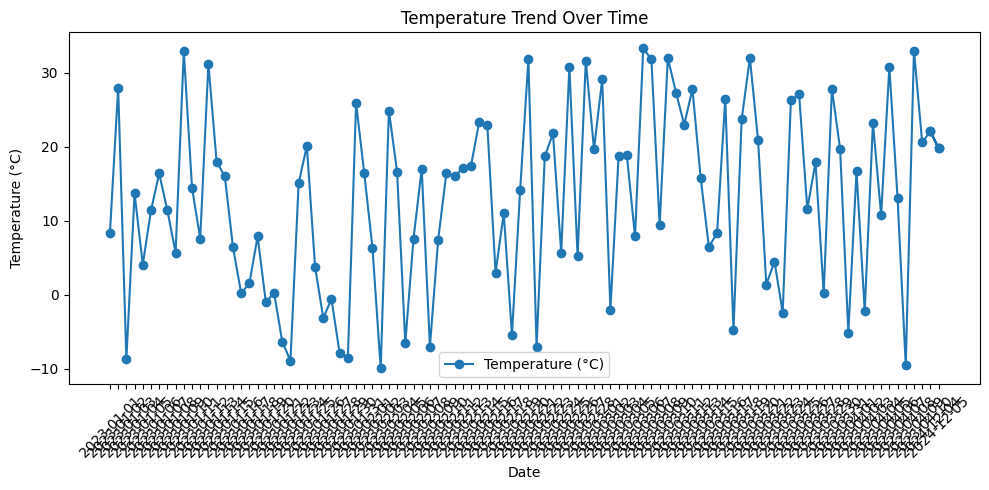

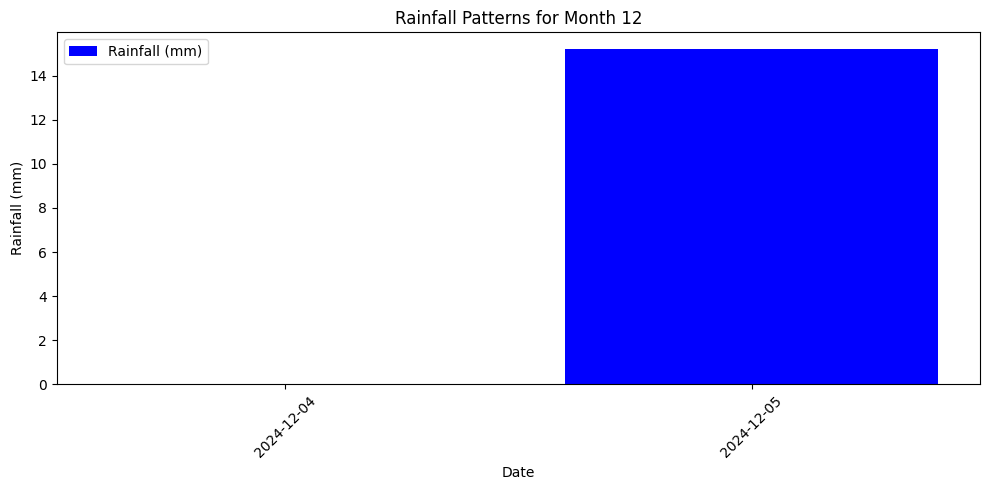


Monthly Summary Table:
Month      Avg Temp (°C)   Total Rainfall (mm)  Avg Wind Speed (km/h)
-----------------------------------------------------------------
2023-01    8.25            1596.40              23.66               
2023-02    12.40           1526.50              24.51               
2023-03    17.42           1452.40              22.10               
2023-04    13.14           270.80               29.30               
2024-12    20.95           30.40                15.00               
Extreme Weather Events:
- Highest Temperature: 33.3 °C
- Lowest Temperature: -9.9 °C
- Highest Rainfall: 96.7 mm
Summary Report (2024-12-01 to 2024-12-31):
- Average Temperature: 20.95 °C
- Maximum Temperature: 22.10 °C
- Minimum Temperature: 19.80 °C
- Average Rainfall: 7.60 mm
- Maximum Rainfall: 15.20 mm
- Minimum Rainfall: 0.00 mm
- Average Wind Speed: 15.00 km/h
- Maximum Wind Speed: 18.00 km/h
- Minimum Wind Speed: 12.00 km/h

No extreme weather days in the specified date range.
Analy

In [8]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import defaultdict
import json


def read_weather_data(file_path):
    """Reads weather data from a CSV file and returns a DataFrame."""
    try:
        data = pd.read_csv(file_path)
        # Ensuring correct data types
        data['Temperature (°C)'] = data['Temperature (°C)'].astype(float)
        data['Rainfall (mm)'] = data['Rainfall (mm)'].astype(float)
        data['Humidity (%)'] = data['Humidity (%)'].astype(int)
        data['Wind Speed (km/h)'] = data['Wind Speed (km/h)'].astype(float)
        # Handle missing values
        data.fillna({
            'Temperature (°C)': data['Temperature (°C)'].mean(),
            'Rainfall (mm)': data['Rainfall (mm)'].mean(),
            'Humidity (%)': data['Humidity (%)'].mean(),
            'Wind Speed (km/h)': data['Wind Speed (km/h)'].mean(),
            'Condition': 'Unknown'
        }, inplace=True)
        return data
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None
    except Exception as e:
        print(f"Error while reading the file: {e}")
        return None

def validate_weather_data(row):
    """Validates a single row of weather data."""
    try:
        # Validate date
        datetime.strptime(row['Date'], '%Y-%m-%d')
        # Validate numerical fields
        row['Temperature (°C)'] = float(row['Temperature (°C)'])
        row['Rainfall (mm)'] = float(row['Rainfall (mm)'])
        row['Humidity (%)'] = int(row['Humidity (%)'])
        row['Wind Speed (km/h)'] = float(row['Wind Speed (km/h)'])
        return True
    except ValueError as e:
        print(f"Validation error: {e}")
        return False

def import_weather_data(file_path, new_data):
    """Imports new weather data into the application."""
    try:
        with open(file_path, 'a', newline='') as file:
            csv_writer = csv.DictWriter(file, fieldnames=new_data[0].keys())
            for row in new_data:
                if validate_weather_data(row):
                    csv_writer.writerow(row)
                else:
                    print(f"Invalid data skipped: {row}")
    except Exception as e:
        print(f"Error while importing data: {e}")

def save_analysis_config(config, file_path='analysis_config.json'):
    """Saves user-defined analysis configurations to a JSON file."""
    try:
        with open(file_path, 'w') as file:
            json.dump(config, file)
        print(f"Analysis configuration saved to {file_path}.")
    except Exception as e:
        print(f"Error saving configuration: {e}")

def load_analysis_config(file_path='analysis_config.json'):
    """Loads user-defined analysis configurations from a JSON file."""
    try:
        with open(file_path, 'r') as file:
            config = json.load(file)
        print(f"Analysis configuration loaded from {file_path}.")
        return config
    except FileNotFoundError:
        print(f"No configuration file found at {file_path}. Starting with default settings.")
        return {}
    except Exception as e:
        print(f"Error loading configuration: {e}")
        return {}

def plot_temperature_trend(data):
    """Plots temperature trends over time."""
    plt.figure(figsize=(10, 5))
    plt.plot(data['Date'], data['Temperature (°C)'], marker='o', label='Temperature (°C)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Trend Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_rainfall_patterns(data, month):
    """Plots rainfall patterns for a specific month."""
    data['Date'] = pd.to_datetime(data['Date'])
    monthly_data = data[data['Date'].dt.month == month]
    plt.figure(figsize=(10, 5))
    plt.bar(monthly_data['Date'].dt.strftime('%Y-%m-%d'), monthly_data['Rainfall (mm)'], color='blue', label='Rainfall (mm)')
    plt.xlabel('Date')
    plt.ylabel('Rainfall (mm)')
    plt.title(f'Rainfall Patterns for Month {month}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def generate_summary_table(data):
    """Generates a summary table showing weather stats by month."""
    data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')
    summary = data.groupby('Month').agg(
        Avg_Temp=('Temperature (°C)', 'mean'),
        Total_Rainfall=('Rainfall (mm)', 'sum'),
        Avg_Wind_Speed=('Wind Speed (km/h)', 'mean')
    ).reset_index()

    print("\nMonthly Summary Table:")
    print(f"{'Month':<10} {'Avg Temp (°C)':<15} {'Total Rainfall (mm)':<20} {'Avg Wind Speed (km/h)':<20}")
    print("-" * 65)
    for _, row in summary.iterrows():
        month_str = row['Month'].strftime('%Y-%m')
        print(f"{month_str:<10} {row['Avg_Temp']: <15.2f} {row['Total_Rainfall']:<20.2f} {row['Avg_Wind_Speed']:<20.2f}")

def analyze_extreme_weather(data):
    """Identifies extreme weather events from the data."""
    max_temp = data['Temperature (°C)'].max()
    min_temp = data['Temperature (°C)'].min()
    max_rainfall = data['Rainfall (mm)'].max()

    print("Extreme Weather Events:")
    print(f"- Highest Temperature: {max_temp} °C")
    print(f"- Lowest Temperature: {min_temp} °C")
    print(f"- Highest Rainfall: {max_rainfall} mm")

def generate_summary_report(data, start_date, end_date):
    """Generates a summary report for a specified date range."""
    try:
        date_filtered = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
        if date_filtered.empty:
            print("No data available for the specified date range.")
            return

        print(f"Summary Report ({start_date} to {end_date}):")
        print(f"- Average Temperature: {date_filtered['Temperature (°C)'].mean():.2f} °C")
        print(f"- Maximum Temperature: {date_filtered['Temperature (°C)'].max():.2f} °C")
        print(f"- Minimum Temperature: {date_filtered['Temperature (°C)'].min():.2f} °C")
        print(f"- Average Rainfall: {date_filtered['Rainfall (mm)'].mean():.2f} mm")
        print(f"- Maximum Rainfall: {date_filtered['Rainfall (mm)'].max():.2f} mm")
        print(f"- Minimum Rainfall: {date_filtered['Rainfall (mm)'].min():.2f} mm")
        print(f"- Average Wind Speed: {date_filtered['Wind Speed (km/h)'].mean():.2f} km/h")
        print(f"- Maximum Wind Speed: {date_filtered['Wind Speed (km/h)'].max():.2f} km/h")
        print(f"- Minimum Wind Speed: {date_filtered['Wind Speed (km/h)'].min():.2f} km/h")

        extreme_conditions = date_filtered[(date_filtered['Condition'].str.contains('Storm', case=False)) |
                                           (date_filtered['Temperature (°C)'] > 35) |
                                           (date_filtered['Temperature (°C)'] < 0)]
        if not extreme_conditions.empty:
            print("\nExtreme Weather Days:")
            print(extreme_conditions[['Date', 'Condition', 'Temperature (°C)', 'Rainfall (mm)', 'Wind Speed (km/h)']])
        else:
            print("\nNo extreme weather days in the specified date range.")
    except Exception as e:
        print(f"Error generating summary report: {e}")

def export_weather_report(data, file_path):
    """Exports weather data summary to a CSV file."""
    try:
        data.to_csv(file_path, index=False)
        print(f"Weather report successfully exported to {file_path}.")
    except Exception as e:
        print(f"Error exporting weather report: {e}")

def search_weather_data(data, query, field):
    """Searches for weather data by a specific field and query."""
    try:
        if field not in data.columns:
            print(f"Field '{field}' does not exist in the data.")
            return

        results = data[data[field].astype(str).str.contains(query, case=False, na=False)]
        if results.empty:
            print(f"No records found for query '{query}' in field '{field}'.")
        else:
            print(f"Search Results for '{query}' in '{field}':")
            print(results)
    except Exception as e:
        print(f"Error searching data: {e}")


# Example usage
if __name__ == "__main__":
    file_path = '/content/weather_data.csv'
    weather_data = read_weather_data(file_path)

    if weather_data is not None:
        # Visualize data
        plot_temperature_trend(weather_data)
        plot_rainfall_patterns(weather_data, month=12)

        # Generate monthly summary table
        generate_summary_table(weather_data)


        # Analyze extreme events
        analyze_extreme_weather(weather_data)


        # Generate a summary report for a specified date range
        generate_summary_report(weather_data, '2024-12-01', '2024-12-31')

        # Example: Importing new data
        new_data = [
            {'Date': '2024-12-04', 'Temperature (\u00b0C)': '22.1', 'Rainfall (mm)': '0.0', 'Humidity (%)': '68', 'Wind Speed (km/h)': '12', 'Condition': 'Sunny'},
            {'Date': '2024-12-05', 'Temperature (\u00b0C)': '19.8', 'Rainfall (mm)': '15.2', 'Humidity (%)': '85', 'Wind Speed (km/h)': '18', 'Condition': 'Rainy'}
        ]
        import_weather_data(file_path, new_data)

        # Save and load analysis configurations
        config = {
            'start_date': '2024-12-01',
            'end_date': '2024-12-31',
            'visualization': 'temperature_trend'
        }
        save_analysis_config(config)
        loaded_config = load_analysis_config()

        # Export weather report
        export_file_path = 'weather_report.csv'
        export_weather_report(weather_data, export_file_path)

        # Search for weather data
        search_weather_data(weather_data, 'Rainy', 'Condition')
        search_weather_data(weather_data, '2024-12-04', 'Date')
